In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

('MTO_pend_noise.csv', EmptyDataError('No columns to parse from file',))


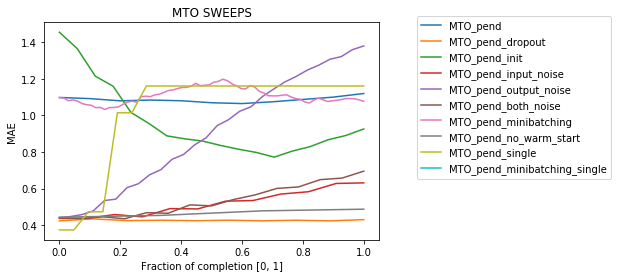

In [93]:
# MTO GRAPH
root_dir = "sweep_csvs/"
fnames = [
    "MTO_pend.csv",
    "MTO_pend_dropout.csv",
    "MTO_pend_init.csv",
    "MTO_pend_input_noise.csv",
    "MTO_pend_output_noise.csv",
    "MTO_pend_both_noise.csv",
    "MTO_pend_noise.csv",
    "MTO_pend_minibatching.csv",
    "MTO_pend_no_warm_start.csv"
]
fnames += [
    "MTO_pend_single.csv",
    "MTO_pend_minibatching_single.csv",
]

plt.figure()
plt.title("MTO SWEEPS")
y_str = 'MAE'

for fname in fnames:
    try:
        df = pd.read_csv(root_dir+fname)
    except Exception as e:
        print(fname, e)
        continue
#     df['time'] = df['time'] - df['time'][0]
#     print(df)

#     x_vals = df['time']; plt.xlabel('time')
#     x_vals = df['iters']; plt.xlabel('iters')
    x_vals = np.linspace(0, 1, df.shape[0]); plt.xlabel('Fraction of completion [0, 1]')


    y_vals = df[y_str]; plt.ylabel(y_str)
    

    label = fname.split('.')[0]
    plt.plot(x_vals, y_vals, label=label)
    
plt.legend(bbox_to_anchor=(1.1, 1.05))


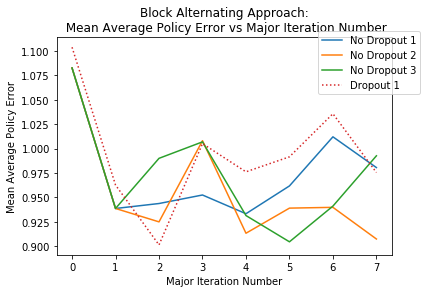

In [137]:
# MTO GRAPH
root_dir = "sweep_csvs/"
fnames = [
    "Igor_pend.csv",
#     "Igor_pend2.csv",
    "Igor_pend3.csv",
    "Igor_pend4.csv",
#     "Igor_pend_dropout.csv",
#     "Igor_pend_dropout2.csv",
#     "Igor_pend_dropout3.csv",
#     "Igor_pend_dropout_nn.csv",
#     "Igor_pend_dropout_nn2.csv",
#     "Igor_pend_dropout_nn3.csv",
#     "Igor_pend_dropout_nn4.csv",
#     "Igor_pend_init.csv",
#     "Igor_pend_input_noise.csv",
#     "Igor_pend_output_noise.csv",
#     "Igor_pend_both_noise.csv",
#     "Igor_pend_both_noise2.csv",
#     "Igor_pend_both_noise3.csv",
#     "Igor_pend_noise.csv",
#     "Igor_pend_minibatching.csv",
#     "Igor_pend_no_warm_start.csv"
    "Igor_pend_layernorm.csv",
]

plt.figure()
plt.title("Block Alternating Approach:\n Mean Average Policy Error vs Major Iteration Number")
y_str = 'MAE'
# y_str = 'MSE'
# y_str = 'total_cost'

def label_maker():
    for label in ['No Dropout 1',
                 'No Dropout 2',
                 'No Dropout 3',
                 'Dropout 1',
                 'Dropout 2',
                 'Dropout 3']:
        yield label

label_maker
labels = ['No Dropout 1',
         'No Dropout 2',
         'No Dropout 3',
         'Dropout 1',
         'Dropout 2',
         'Dropout 3']
for fname, label in zip(fnames, labels):
    try:
        df = pd.read_csv(root_dir+fname)
    except Exception as e:
        print(fname, e)
        continue
    df['time'] = df['time'] - df['time'][0]
#     print(df)

#     x_vals = df['time']; plt.xlabel('time')
    x_vals = df['itr']; plt.xlabel('Major Iteration Number')
#     x_vals = np.linspace(0, 1, df.shape[0]); plt.xlabel('Fraction of completion [0, 1]')


    y_vals = df[y_str]; plt.ylabel("Mean Average Policy Error")
    
    x_vals = x_vals.iloc[:8]
    y_vals = y_vals.iloc[:8]
    
#     label = fname.split('.')[0]
    if 'No' in label:
        symbol = "-"
    else:
        symbol = ":"
    plt.plot(x_vals, y_vals, symbol, label=label)
    
# plt.ylim(6000, 13000)
plt.legend(bbox_to_anchor=(1.1, 1.05))